In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import (linspace, sin, cos, pi)
from numpy.fft import rfft, rfftfreq
from sklearn.decomposition import FastICA

In [2]:
len_m = 500
x = linspace(0, len_m, len_m)  # возвращает равномерно распределённые числа в данном интервале

a0 = 1
a1 = 0.75
a2 = 4.75
w0 = 0.1815
w1 = 0.176
w2 = 0.02
k = 0.000002

left_ind = math.floor(len_m * 0.165)
right_ind = math.ceil(len_m * 0.185)

# T= 2*pi
f1 = np.exp(-k*x**2)*(a0*sin(2 * pi * w0 * x + 2 * pi * 0.00) + a1*sin(2 * pi * w1 * x + 2 * pi * 0.00) + a2*cos(2 * pi * w2 * x + 2 * pi * 0.00)) + [2*x for x in (np.random.rand(len_m) - 0.5)]
f2 = np.exp(-k*x**2)*(a0*sin(2 * pi * w0 * x + 2 * pi * 0.00425) + a1*sin(2 * pi * w1 * x + 2 * pi * 0.00425) + a2*cos(2 * pi * w2 * x + 2 * pi * 0.00425)) + [2*x for x in (np.random.rand(len_m) - 0.5)]
f3 = np.exp(-k*x**2)*(a0*sin(2 * pi * w0 * x + 2 * pi * 0.0085) + a1*sin(2 * pi * w1 * x + 2 * pi * 0.0085) + a2*cos(2 * pi * w2 * x + 2 * pi * 0.0085)) + [2*x for x in (np.random.rand(len_m) - 0.5)]
f4 = np.exp(-k*x**2)*(a0*sin(2 * pi * w0 * x + 2 * pi * 0.01275) + a1*sin(2 * pi * w1 * x + 2 * pi * 0.01275) + a2*cos(2 * pi * w2 * x + 2 * pi * 0.01275)) + [2*x for x in (np.random.rand(len_m) - 0.5)]

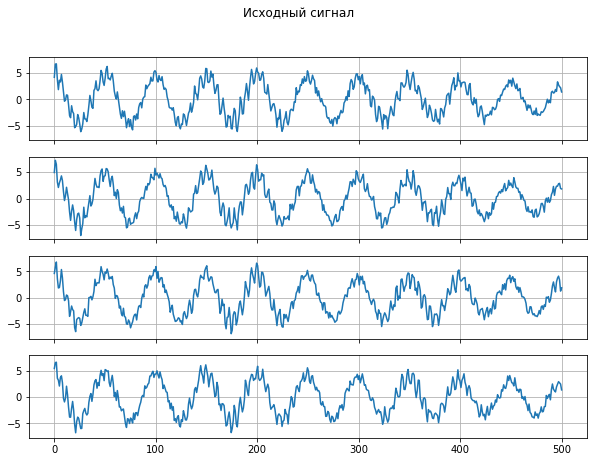

In [3]:
nrows, ncols = 4, 1
figsize = [10, 7]
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharex=True, sharey=True)
fig.suptitle('Исходный сигнал')
ax[0].plot(x, f1)
ax[0].grid(True)
ax[1].plot(x, f2)
ax[1].grid(True)
ax[2].plot(x, f3)
ax[2].grid(True)
ax[3].plot(x, f4)
ax[3].grid(True)

plt.show()


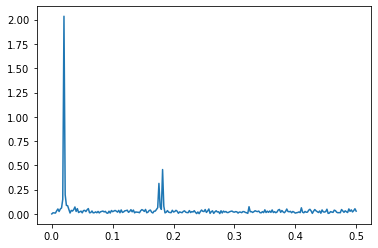

In [6]:
spectrs = rfft(f1 - np.mean(f1)) / (len(x))
nu = rfftfreq(len_m, 1.)
plt.plot(nu, np.abs(spectrs))

In [7]:
Mass = np.c_[f1, f2, f3, f4]
Mass2 = np.delete(Mass, (0), axis=0)
zeros = np.array([0, 0, 0, 0])
Mass2 = np.vstack((Mass2, zeros))
Mass = np.concatenate((Mass, Mass2), axis=1)

Mass2 = np.delete(Mass, (0, 1), axis=0) 
zeros_2 = np.zeros((2, 8))
Mass2 = np.vstack((Mass2, zeros_2))
Mass = np.concatenate((Mass, Mass2), axis=1)

In [8]:
#Mas = np.c_[f1, f2, f3, f4]
ica = FastICA(n_components=16)
S_ = ica.fit_transform(Mass)

# spectrf = rfft(Mas - np.mean(Mas)) / (len(x))
nu = rfftfreq(len_m, 1.)


(500,)
0.176
0.182
0.184
0.17400000000000002
0.182
0.176
0.182
0.17200000000000001
0.176
0.182
0.182
0.182
0.176
0.17
0.176
0.182


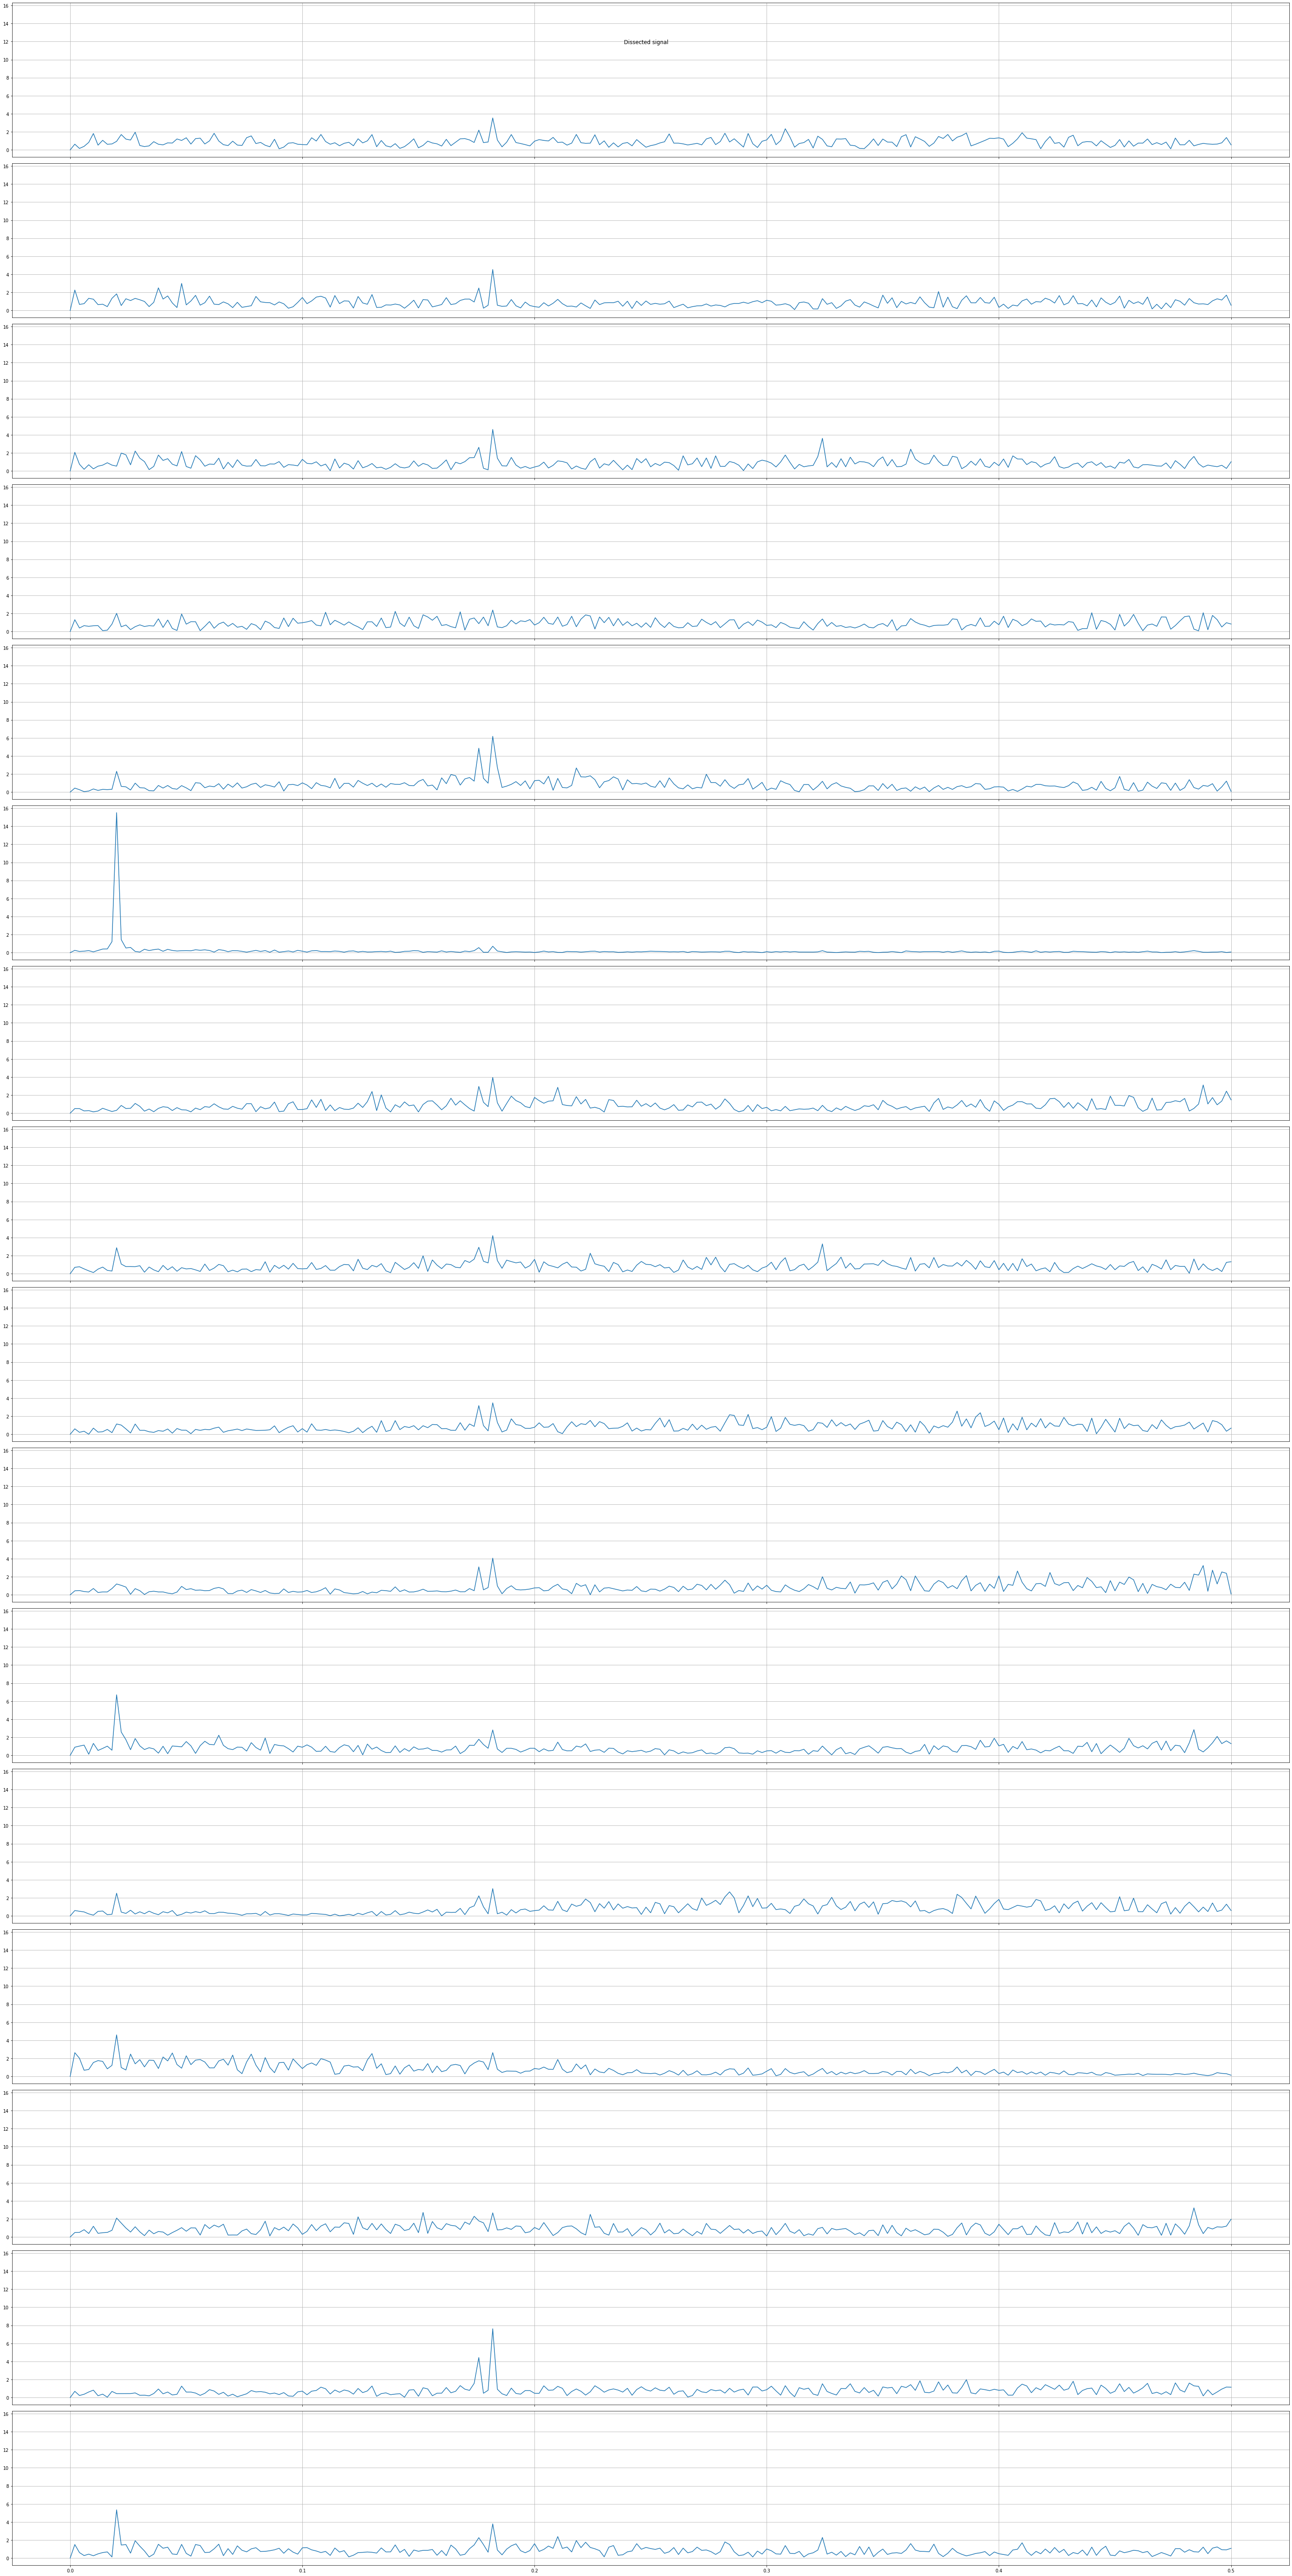

In [10]:
fig, ax = plt.subplots(nrows=16, ncols=1, figsize=[40, 80], sharex=True, sharey=True)
fig.suptitle('Dissected signal')
print(S_[:, 1].shape)
for i in range(S_.shape[1]):
    spectrf = rfft(S_[:, i])
    ax[i].plot(nu, np.abs(spectrf))
    #print(nu[np.argmax(np.abs(spectrf), axis=0)])
    ax[i].grid(True)
    
    tmp_nu = nu[left_ind: right_ind]
    tmp_x = spectrf[left_ind: right_ind]
    ind = np.argmax(tmp_x)
    print(tmp_nu[ind])


#axes = plt.gca()
#axes.set_xlim([0.17, 0.185])
plt.tight_layout()

plt.savefig('ICA Example.png')
plt.show()